In [13]:
IMPORTING LIBRARIES:

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
DATASET UPLOAD:

In [54]:
diabetes_df = pd.read_csv('C:\\Users\\HP\\Downloads\\archive (1)\\diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
EXPLORATORY DATA ANALYSIS:

In [55]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
INFORMATION ABOUT DATASET:

In [56]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
CHECKING THE NULL VALUES IN DATASET:

In [57]:
diabetes_df.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [17]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
"In the given code snippet, the approach to handling missing values diverges from traditional null-checking methods. Rather than explicitly checking for null values using isnull() and calculating their sum, the code immediately addresses potential missing data by creating a copy of the original dataset (diabetes_df_copy). This copy is then subjected to imputation techniques without initially distinguishing between explicit nulls and 0 values. The specified columns - 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI' - undergo mean imputation directly through fillna(diabetes_df_copy.mean()). Consequently, missing or zero values are replaced with the mean of each respective column. The subsequent display of NaN counts through print(diabetes_df_copy.isnull().sum()) provides insights into the effectiveness of the imputation process in handling missing or zero values within the dataset."

In [58]:
import numpy as np
import pandas as pd

# Load the dataset
diabetes_df = pd.read_csv('C:\\Users\\HP\\Downloads\\archive (1)\\diabetes.csv')

# Define columns to replace and create a copy of the dataframe
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_df_copy = diabetes_df.copy(deep=True)

# Alternatively, consider using imputation techniques for missing values
# Using mean imputation for the specified columns
diabetes_df_copy.fillna(diabetes_df_copy.mean(), inplace=True)

# Displaying the Count of NANs after imputation
print(diabetes_df_copy.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
DATA VISUALIZATION:

In [ ]:
DATA DISTRIBUTION PLOTS BEFORE REMOVING THE NULL VALUES :

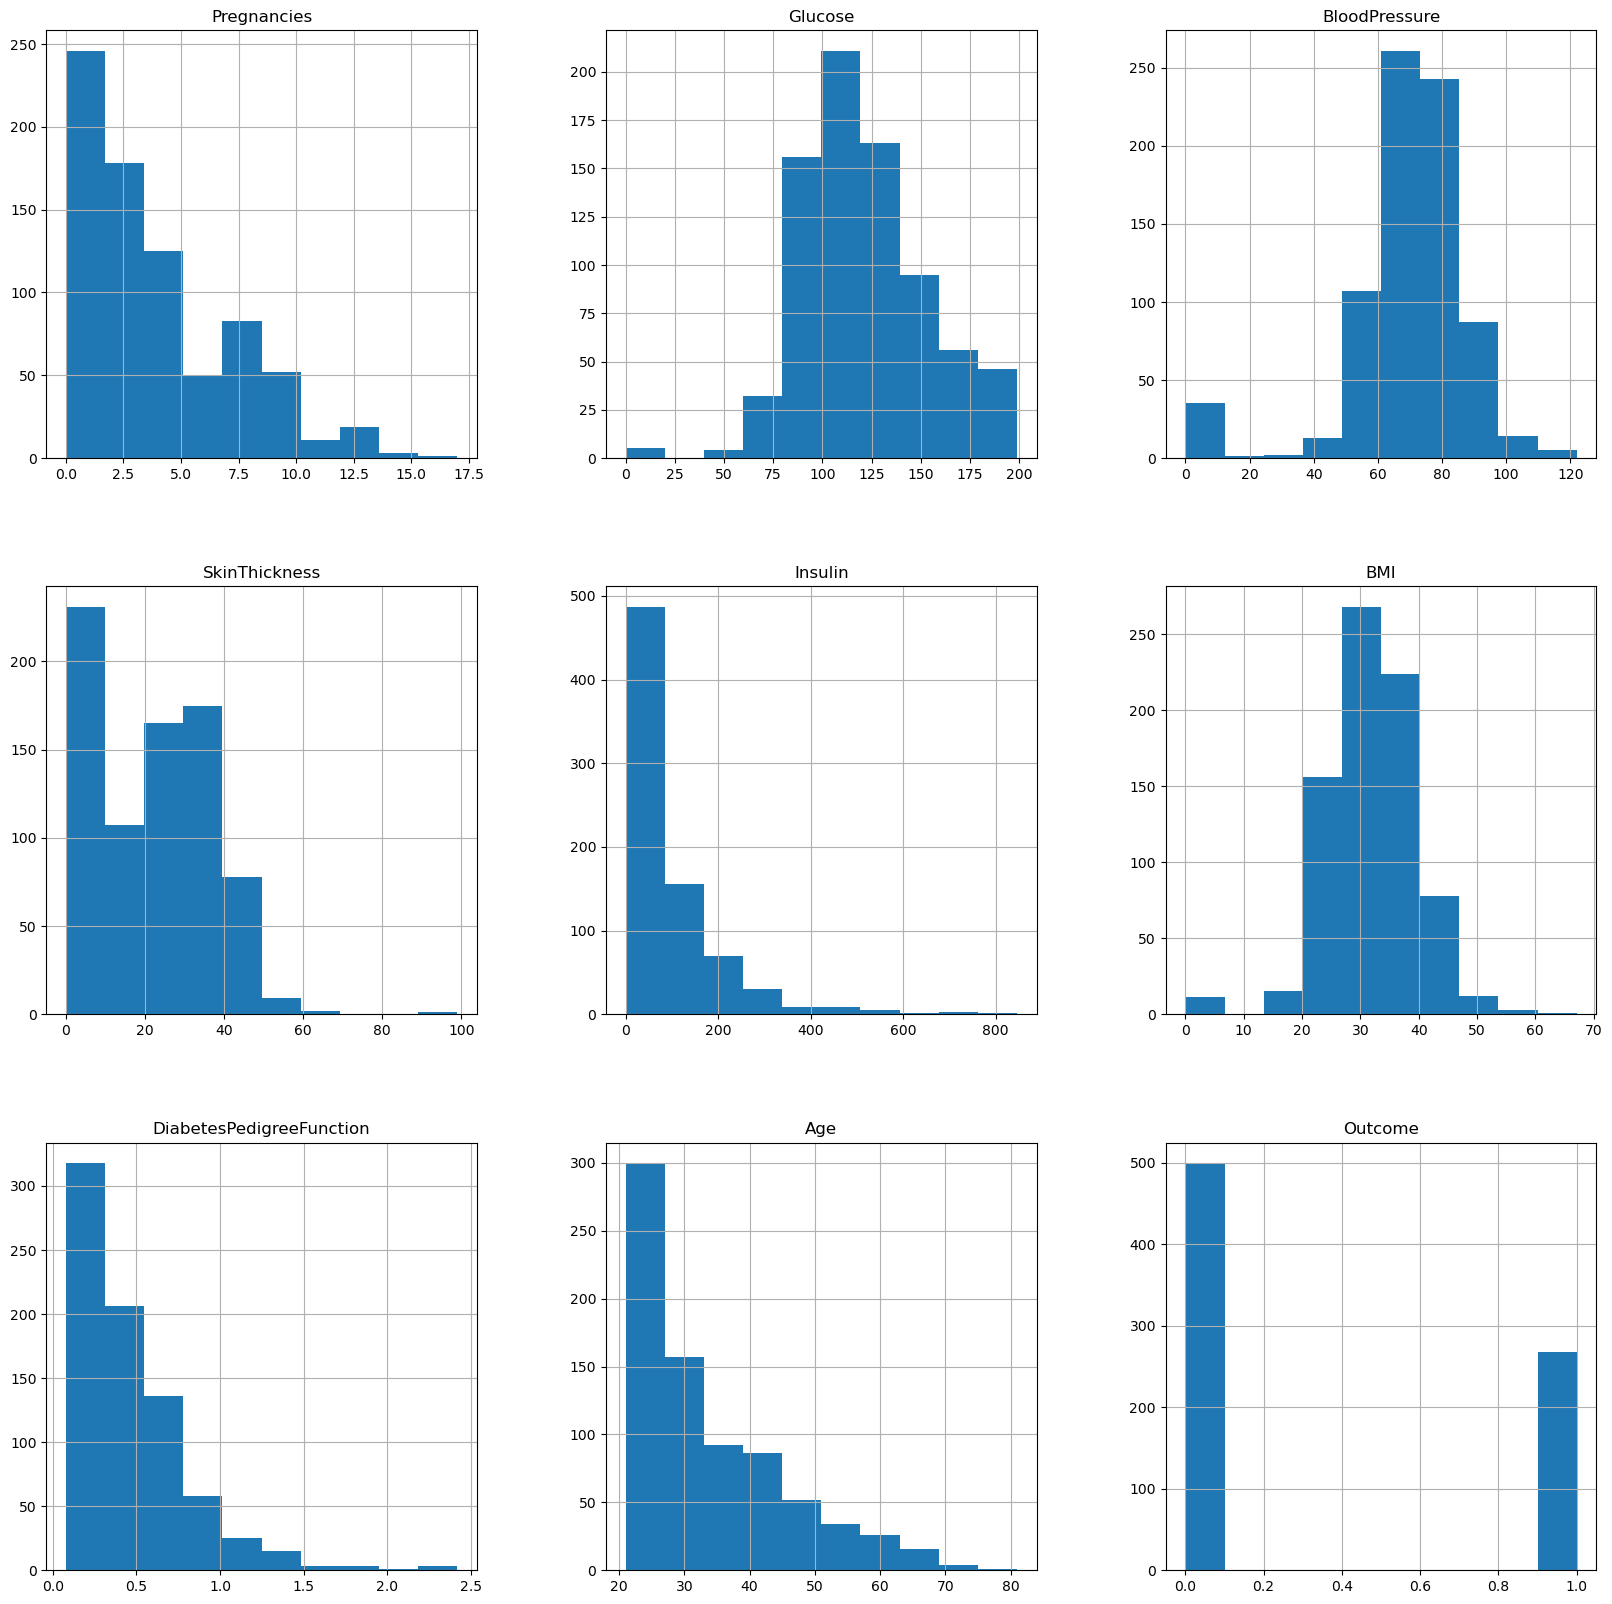

In [59]:
p = diabetes_df.hist(figsize = (20,20))

In [ ]:
Now we will be imputing the mean value of the column to each missing value of that particular column.

In [27]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

In [ ]:
DATA DISTRIBUTION PLOTS AFTER REMOVING THE NULL VALUES:

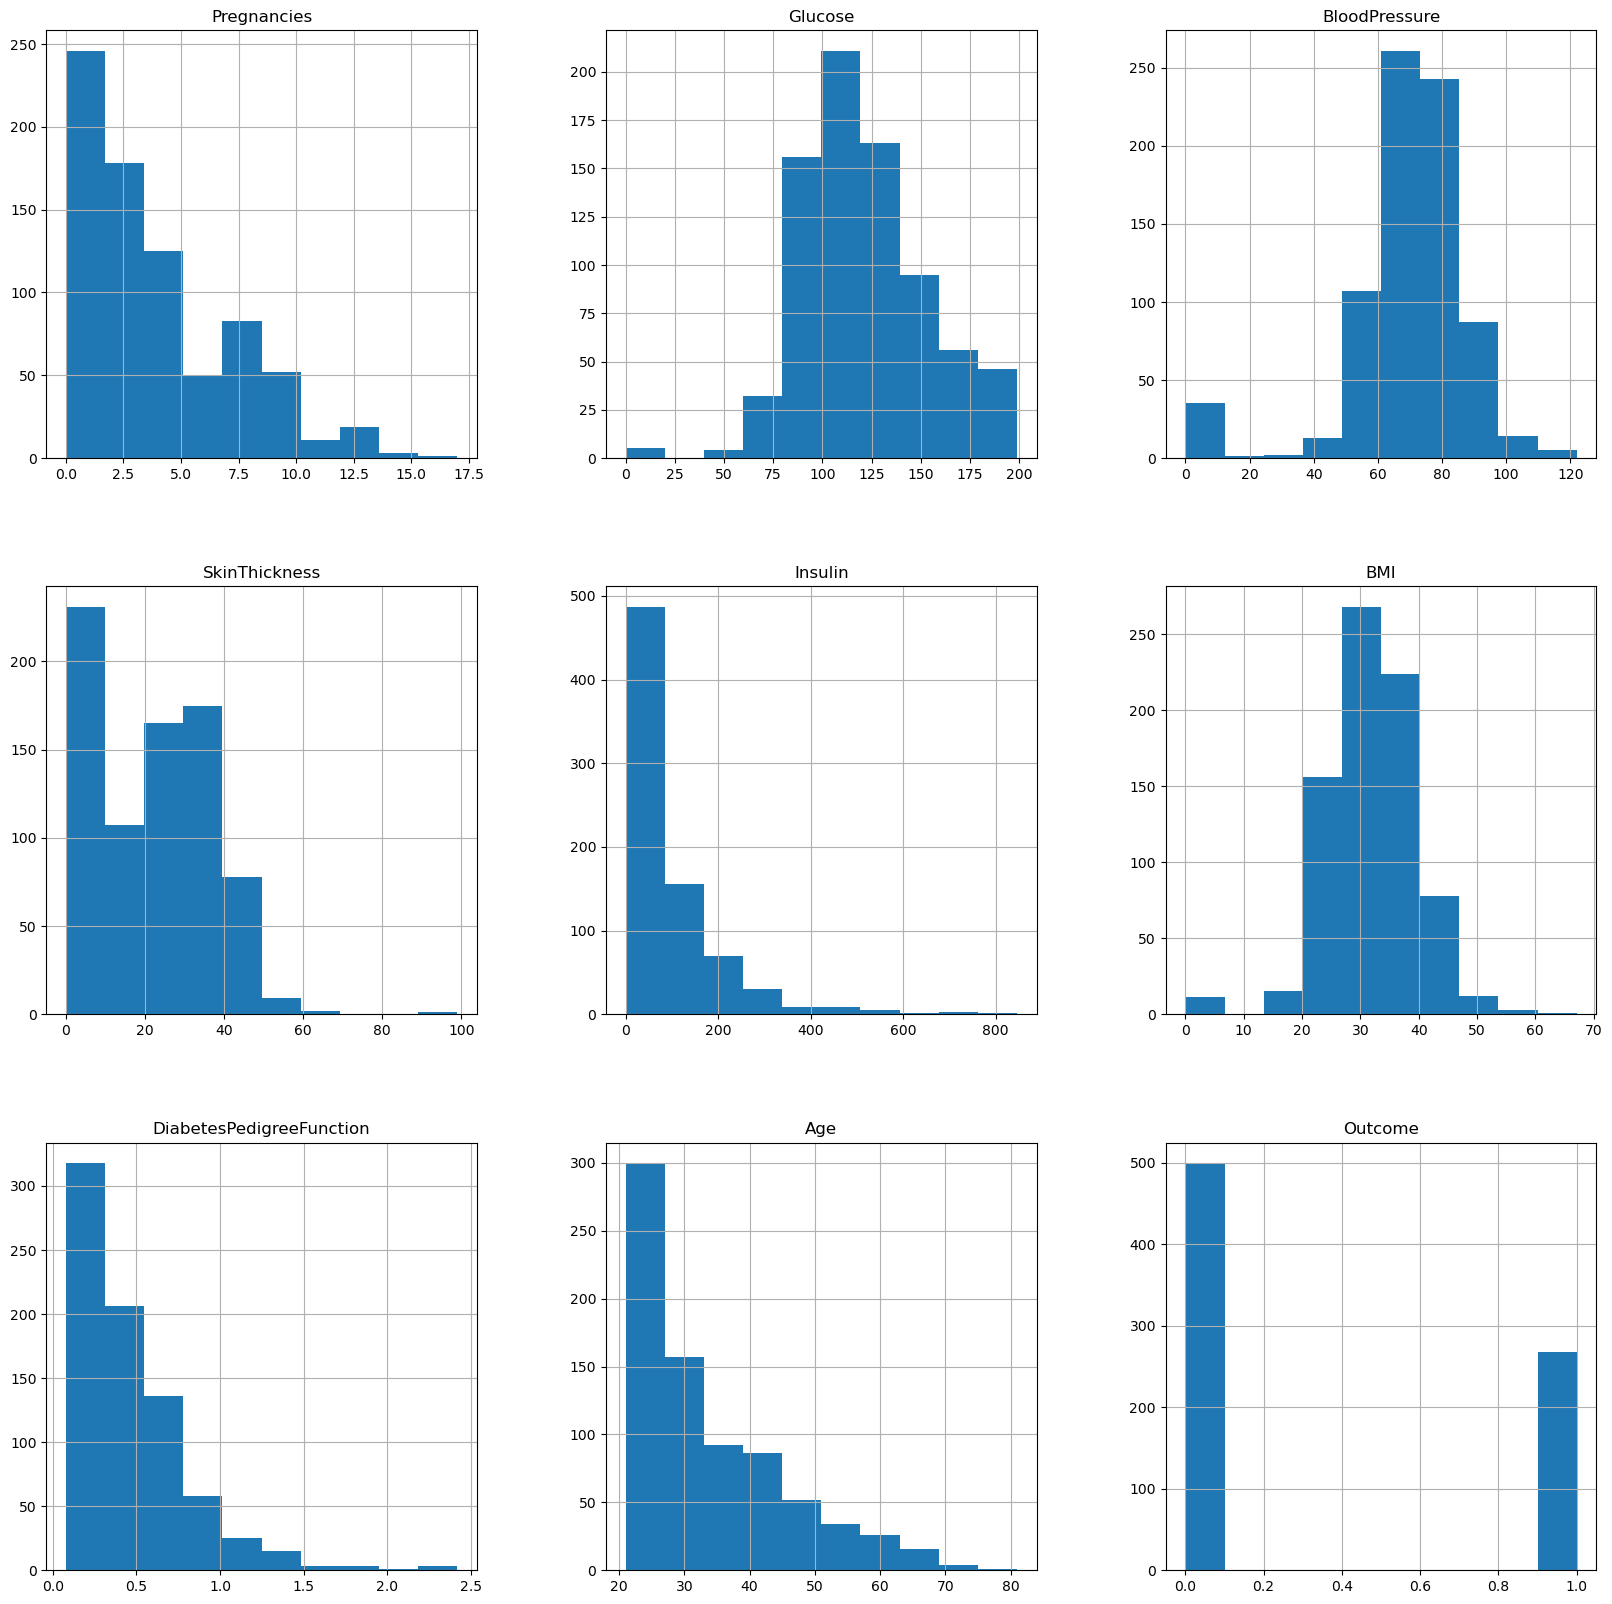

In [60]:
# Data Distribution Plots after imputation
p = diabetes_df_copy.hist(figsize=(20, 20))

In [ ]:
FEATURES CORRELATION:

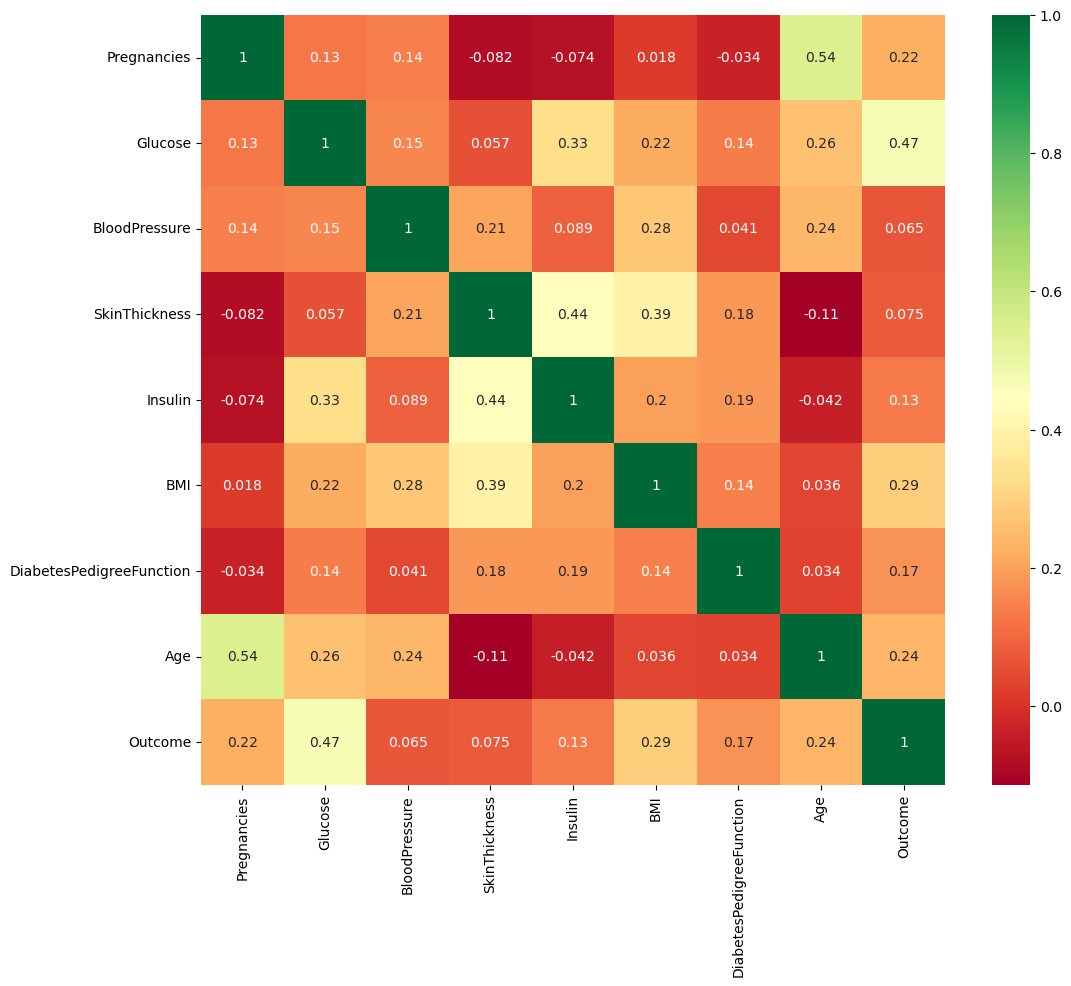

In [61]:
plt.figure(figsize=(12, 10))
correlation_matrix = diabetes_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.show()

In [ ]:
DATA SCALING:

In [ ]:
Let's check the data before scaling it

In [62]:
diabetes_df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
AFTER STANDARD SCALING:

In [63]:
columns_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(diabetes_df_copy[columns_to_scale]), columns=columns_to_scale)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [ ]:
MODEL BUILDING USING ML ALGORITHMS:

In [ ]:
RANDOM FOREST 

In [ ]:
DATA SPLITTING: (FEATURE SELECTION)

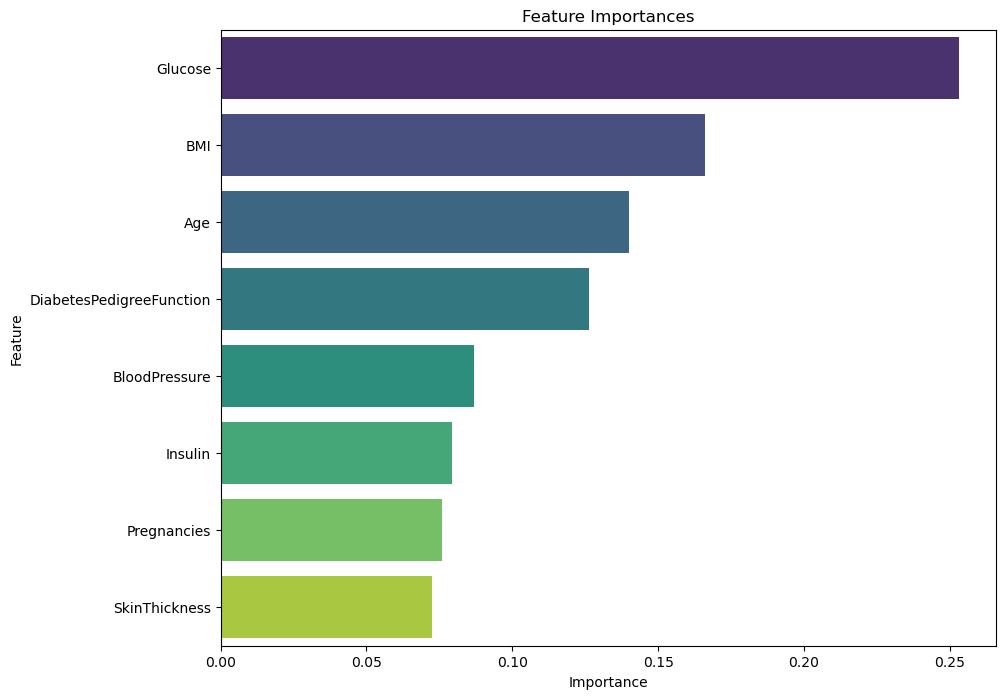

In [64]:
# Feature selection using Random Forest
# Specify the features and target variable
X = diabetes_df_copy.drop('Outcome', axis=1)
y = diabetes_df_copy['Outcome']

# Perform the train-test split
random_state_value = 7  # You can change this value if needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state_value)

# Create and train the Random Forest Classifier for feature selection
rfc_feature_selection = RandomForestClassifier(n_estimators=200)
rfc_feature_selection.fit(X_train, y_train)

# Extract feature importances
feature_importances = rfc_feature_selection.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances')
plt.show()

# Select top features based on importance
threshold = 0.02  # Adjust the threshold as needed
selected_features = feature_importance_df.loc[feature_importance_df['Importance'] > threshold]['Feature'].values

# Use only the selected features for training and testing
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [65]:
# MODEL BUILDING USING ML ALGORITHMS:
# RANDOM FOREST:
# Create and train the RandomForestClassifier with selected features
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train_selected, y_train)

# Predict on the test set
predictions_rfc = rfc.predict(X_test_selected)

# Calculate and print the accuracy score
accuracy_rfc = accuracy_score(y_test, predictions_rfc)
print("Random Forest Accuracy Score =", format(accuracy_rfc))

Random Forest Accuracy Score = 0.7716535433070866


In [ ]:
CLASSIFICATION REPORT & CONFUSION MATRIX:

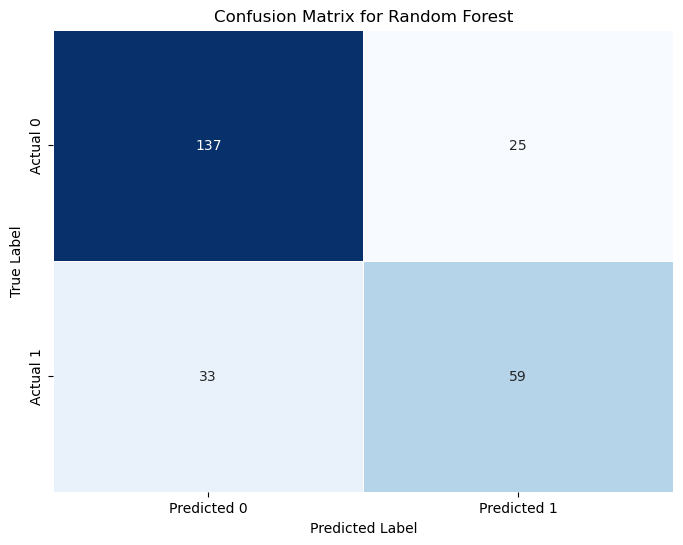

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       162
           1       0.70      0.64      0.67        92

    accuracy                           0.77       254
   macro avg       0.75      0.74      0.75       254
weighted avg       0.77      0.77      0.77       254



In [66]:
# Confusion Matrix:
cm_rfc = confusion_matrix(y_test, predictions_rfc)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Classification Report:
classification_report_rfc = classification_report(y_test, predictions_rfc)
print("Classification Report for Random Forest:\n", classification_report_rfc)

In [ ]:
DECISION TREE:

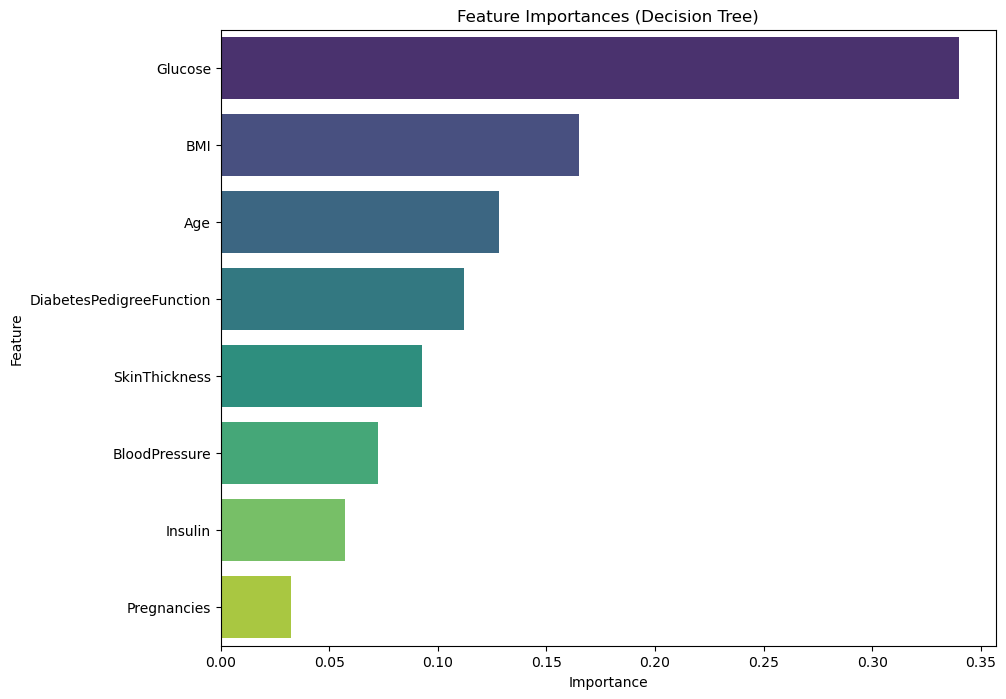

In [67]:
# Create and train the DecisionTreeClassifier for feature selection
dtree_feature_selection = DecisionTreeClassifier()
dtree_feature_selection.fit(X_train, y_train)

# Extract feature importances
feature_importances_dtree = dtree_feature_selection.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df_dtree = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances_dtree
})

# Sort features by importance in descending order
feature_importance_df_dtree = feature_importance_df_dtree.sort_values(by='Importance', ascending=False)

# Plotting the feature importances for Decision Tree
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_dtree, palette='viridis')
plt.title('Feature Importances (Decision Tree)')
plt.show()

# Select top features based on importance
threshold_dtree = 0.02  # Adjust the threshold as needed
selected_features_dtree = feature_importance_df_dtree.loc[
    feature_importance_df_dtree['Importance'] > threshold_dtree]['Feature'].values

# Use only the selected features for training and testing for Decision Tree
X_train_selected_dtree = X_train[selected_features_dtree]
X_test_selected_dtree = X_test[selected_features_dtree]

In [68]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
CHECKING THE ACCURACY SCORE ON TESTING SET:

In [69]:
# Create and train the DecisionTreeClassifier with selected features
dtree = DecisionTreeClassifier()
dtree.fit(X_train_selected_dtree, y_train)

# Predict on the test set for Decision Tree
predictions_dtree = dtree.predict(X_test_selected_dtree)

# Calculate and print the accuracy score for Decision Tree
accuracy_dtree = accuracy_score(y_test, predictions_dtree)
print("Decision Tree Accuracy Score =", format(accuracy_dtree))

Decision Tree Accuracy Score = 0.7165354330708661


In [ ]:
CLASSIFICATION REPORT & CONFUSION MATRIX:

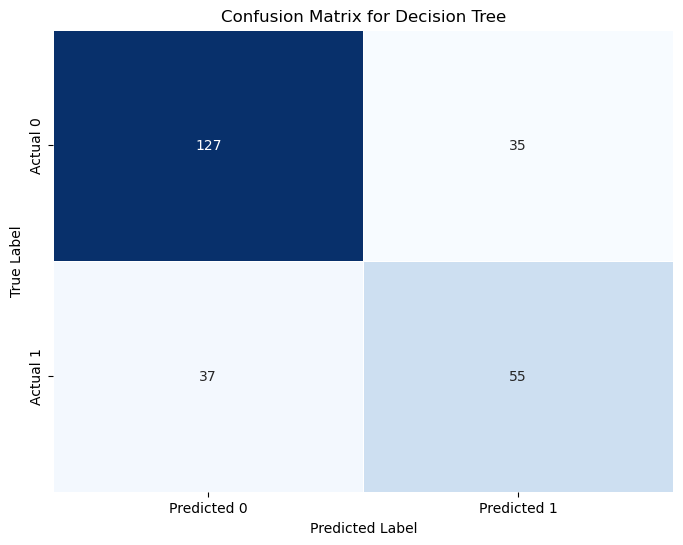

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.77      0.78      0.78       162
           1       0.61      0.60      0.60        92

    accuracy                           0.72       254
   macro avg       0.69      0.69      0.69       254
weighted avg       0.72      0.72      0.72       254



In [70]:
# Assuming 'X_test' contains the testing features with the same columns as 'X_train'

# Train Decision Tree Classifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# Predict on the test set with the same features used for training
predictions_dtree = dtree.predict(X_test)

# Confusion Matrix:
cm_dtree = confusion_matrix(y_test, predictions_dtree)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dtree, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Classification Report:
classification_report_dtree = classification_report(y_test, predictions_dtree)
print("Classification Report for Decision Tree:\n", classification_report_dtree)

In [ ]:
SUPPORT VECTOR MACHINE (SVM):

In [71]:
# Feature selection using Recursive Feature Elimination (RFE) for Support Vector Machines (SVM)
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Specify the features and target variable
X = diabetes_df_copy.drop('Outcome', axis=1)
y = diabetes_df_copy['Outcome']

# Perform the train-test split
random_state_value = 7  # You can change this value if needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state_value)

# Create and train the LinearSVC model
linear_svc_model = LinearSVC()
linear_svc_model.fit(X_train, y_train)

# Use Recursive Feature Elimination (RFE) for feature selection
num_features_to_select = 5  # Adjust the number of features as needed
rfe = RFE(linear_svc_model, n_features_to_select=num_features_to_select)
rfe.fit(X_train, y_train)

# Extract selected features
selected_features = X_train.columns[rfe.support_]

# Use only the selected features for training and testing
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Display the selected features
print("Selected Features:", selected_features)

Selected Features: Index(['Pregnancies', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction'],
      dtype='object')


In [72]:
from sklearn.svm import SVC
from sklearn import metrics

# Assuming 'X_test' contains the testing features
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [76]:
from sklearn.metrics import accuracy_score

# Assuming 'y_test' contains the true labels and 'svc_pred' contains the predicted labels
svc_pred = svc_model.predict(X_test)

# Calculate Accuracy Score for SVC
accuracy_score_svc = accuracy_score(y_test, svc_pred)

# Display the Accuracy Score
print("Accuracy Score for SVC:", accuracy_score_svc)

Accuracy Score for SVC: 0.7480314960629921


Confusion Matrix for SVC:
 [[145  17]
 [ 47  45]]


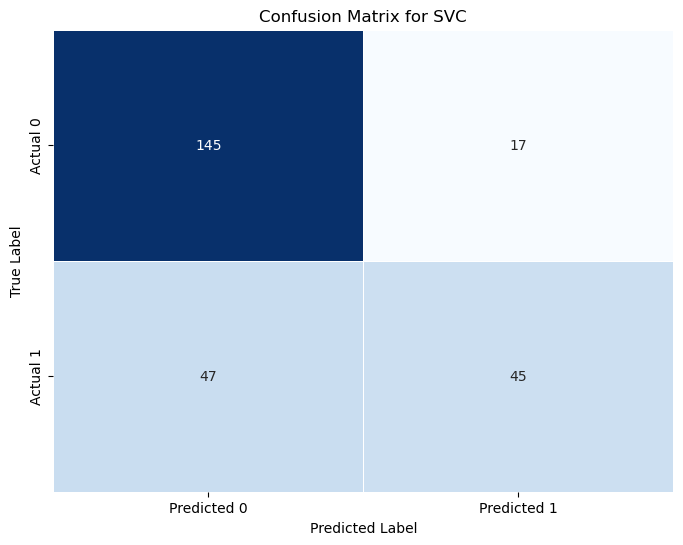

Classification Report for SVC:
               precision    recall  f1-score   support

           0       0.76      0.90      0.82       162
           1       0.73      0.49      0.58        92

    accuracy                           0.75       254
   macro avg       0.74      0.69      0.70       254
weighted avg       0.74      0.75      0.73       254



In [78]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming 'y_test' contains the true labels and 'svc_pred' contains the predicted labels
svc_pred = svc_model.predict(X_test)

# Confusion Matrix for SVC
cm_svc = confusion_matrix(y_test, svc_pred)
print("Confusion Matrix for SVC:\n", cm_svc)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVC')
plt.show()

# Classification Report for SVC
classification_report_svc = classification_report(y_test, svc_pred)
print("Classification Report for SVC:\n", classification_report_svc)


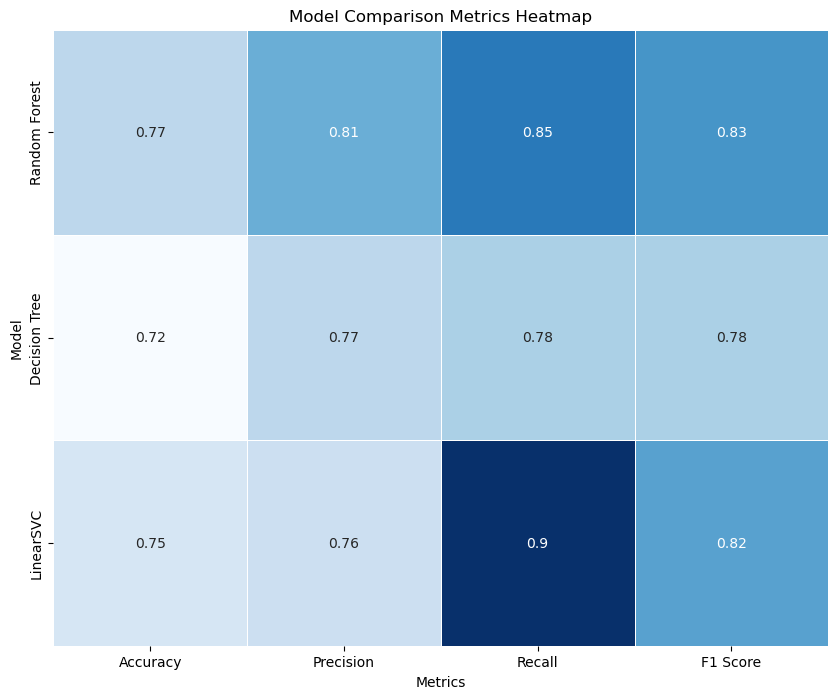

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Replace these with your actual metric values
model_names = ['Random Forest', 'Decision Tree', 'LinearSVC']
accuracy_list = [0.77, 0.72, 0.75]
precision_list = [0.81, 0.77, 0.76]
recall_list = [0.85, 0.78, 0.90]
f1_score_list = [0.83, 0.78, 0.82]

# Create a DataFrame for model comparison metrics
model_comparison_metrics = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_score_list
})

# Create a heatmap for model comparison metrics
plt.figure(figsize=(10, 8))
sns.heatmap(model_comparison_metrics.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score']], annot=True, cmap='Blues', linewidths=.5, cbar=False)
plt.xlabel('Metrics')
plt.ylabel('Model')
plt.title('Model Comparison Metrics Heatmap')
plt.show()